In [44]:
import pandas as pd
import os
import datetime


## Area Calculation

In [45]:
def area_cal(name: str):
    # E.g. wt_25c_0905_1755_20220207
    
    df = pd.read_csv(name)
    total = sum(df['Area'])

    dissociated = sum(x for x in df["Area"] if x < 10000) 
    percent_dissociation = dissociated/total * 100
    result = round(percent_dissociation, 2) # round up  

    return result


## Time Calculation

In [46]:
def time_cal (s):
    s = s.split('_')
    date = s[4]
    start = s[2]
    end = s[3]

    start_time = [int(o) for o in [date[:4], date[4:6], date[6:], start[:2], start[2:]]]
    start_date_obj = datetime.datetime(*start_time)
    
    end_time = [int(o) for o in [date[:4], date[4:6], date[6:], end[:2], end[2:]]]
    end_date_obj = datetime.datetime(*end_time) 

    if end_date_obj < start_date_obj: 
        end_date_obj += datetime.timedelta(days=1)

    duration = (end_date_obj - start_date_obj).total_seconds()/3600 # duration in hours 

    return duration


## Main Script

In [47]:
# Initialize a data set 
data = {'Genotype': [],
        'Temp': [],
        'APF': [],
        'Dissociation': [],
        'Original file': []}

directory = "all areas"

for file in os.listdir(directory):
    if file.endswith(".csv"):
        data['Dissociation'] += [area_cal(directory + '/' + file)]
        
        filename = file.split("_") # separate string into components 
        data['Genotype'] += [filename[0]]
        data['Temp'] += [filename[1]]
        data['APF'] += [time_cal(file.split('.')[0])] # calculate duration 

        data['Original file'] += [file] # add the original file name 

# Create DataFrame
df = pd.DataFrame(data).sort_values(by="APF")
df.to_csv('summary.csv')


In [48]:
Shi_df = df[df["Genotype"]=="Dilp5-Shi"]
TrpA1_df = df[df["Genotype"]=="Dilp5-TrpA1"]
WT_df = df[df["Genotype"]=="WT"]

## Plots and Correlation 

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [50]:
def plot(df, name, title): 
    correlation = df["APF"].corr(df['Dissociation']).round(2)

    # get coeffs of linear fit
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['APF'],df['Dissociation'])
    lm_plot = sns.regplot( x="APF", y="Dissociation", data=df, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)} )
    lm_plot.legend(loc="upper left") # plot legend
    plt.axis([0,16,0,80])
    plt.text(x=10, y=3, s=f"r = {correlation}")
    plt.title(title)
    plt.savefig(f"Scatterplot_With_Regression_Fit_{name}.png")
    return lm_plot

In [51]:
Shi_df.head(2)

,Genotype,Temp,APF,Dissociation,Original file
42,Dilp5-Shi,30c,0.333333,5.86,Dilp5-Shi_30c_1100_1120_20220312.csv
17,Dilp5-Shi,30c,0.450000,6.45,Dilp5-Shi_30c_0838_0905_20220313.csv


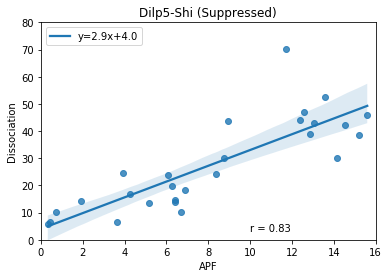

In [52]:
lm_plot = plot(Shi_df, "Dilp5-Shi", "Dilp5-Shi (Suppressed)")

In [53]:
TrpA1_df.head(2)

,Genotype,Temp,APF,Dissociation,Original file
58,Dilp5-TrpA1,30c,0.166667,3.56,Dilp5-TrpA1_30c_0925_0935_20220310.csv
41,Dilp5-TrpA1,30c,0.383333,7.64,Dilp5-TrpA1_30c_0855_0918_20220313.csv


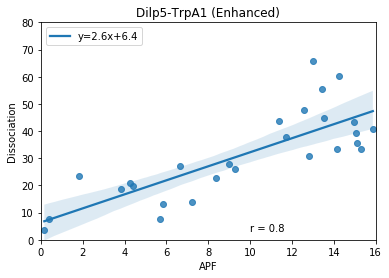

In [54]:
lm_plot = plot(TrpA1_df, "Dilp5-TrpA1", "Dilp5-TrpA1 (Enhanced)")

In [55]:
WT_df.head(2)

,Genotype,Temp,APF,Dissociation,Original file
51,WT,30c,0.166667,2.10,WT_30c_1635_1645_20220413_1x.csv
29,WT,30c,0.300000,1.44,WT_30c_1108_1126_20220312.csv


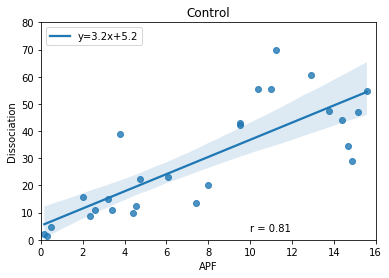

In [56]:
lm_plot = plot(WT_df, "WT", "Control")